### TMDB Box Office

Movies! A big part in our entertaining life. And we are all ready to pay a few bucks almost every weekend to get us out of this overloaded life

We are all aware how much money movie makers make. Infinity wars alone made a $2 billion box office collection in 2018.
But there are also movies that do not end up making big

In this project we use a metadata of past movies from the movie database to try and predict their box office revenue
Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries

Let's dive in!

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data
movies = pd.read_csv('train.csv')

In [3]:
print(movies.shape)

(3000, 23)


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [5]:
pd.options.display.max_columns = 23
pd.set_option('max_colwidth', 100)

movies.head(20)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1i...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the Internet,"" is shot by an unknown assailant, Jacob an...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Violated.,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot...","[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': ...","[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm1...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'i...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as pri...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she's got 30 days!,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriag...","[{'cast_id': 1, 'character': 'Mia Thermopolis', 'credit_id': '52fe43fe9251416c7502561f', 'gender...","[{'credit_id': '52fe43fe9251416c7502563d', 'department': 'Directing', 'gender': 2, 'id': 1201, '...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfecti...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Ri...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conserva...","[{'cast_id': 5, 'character': 'Andrew Neimann', 'credit_id': '52fe4ef7c3a36847f82b3fc3', 'gender'...","[{'credit_id': '54d5356ec3a3683ba0000039', 'department': 'Production', 'gender': 1, 'id': 494, '...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagc...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'po...","[{'cast_id': 1, 'character': 'Vidya Bagchi', 'credit_id': '52fe48779251416c9108d6d9', 'gender': ...","[{'credit_id': '52fe48779251416c9108d6eb', 'department': 'Directing', 'gender': 0, 'id': 95510, ...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",NaN,tt1380152,ko,마린보이,"Marine Boy is the story of a former national swimmer who finds himself in debt, and out of desp

In [6]:
import warnings
warnings.filterwarnings('ignore')
no_of_null = movies.isnull().sum().sort_values(ascending=False)
percent = (no_of_null*100/len(movies)).sort_values(ascending=False)
pd.concat([no_of_null, percent], axis=1, keys=['total','percent'])

,total,percent
Keywords,276,9.200000
belongs_to_collection,2396,79.866667
budget,0,0.000000
cast,13,0.433333
crew,16,0.533333
genres,7,0.233333
homepage,2054,68.466667
id,0,0.000000
imdb_id,0,0.000000
original_language,0,0.000000


In [7]:
#getting rid of redundant columns
red = ['id', 'belongs_to_collection','homepage','imdb_id','original_title','poster_path','status','tagline']
movies.drop(columns=red, inplace=True)

In [8]:
movies.head()

,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,"When Lou, who has become the ""father of the Internet,"" is shot by an unknown assailant, Jacob an...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot...","[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': ...","[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'i...",en,Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as pri...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriag...","[{'cast_id': 1, 'character': 'Mia Thermopolis', 'credit_id': '52fe43fe9251416c7502561f', 'gender...","[{'credit_id': '52fe43fe9251416c7502563d', 'department': 'Directing', 'gender': 2, 'id': 1201, '...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,"Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfecti...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Ri...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conserva...","[{'cast_id': 5, 'character': 'Andrew Neimann', 'credit_id': '52fe4ef7c3a36847f82b3fc3', 'gender'...","[{'credit_id': '54d5356ec3a3683ba0000039', 'department': 'Production', 'gender': 1, 'id': 494, '...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]",hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagc...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'po...","[{'cast_id': 1, 'character': 'Vidya Bagchi', 'credit_id': '52fe48779251416c9108d6d9', 'gender': ...","[{'credit_id': '52fe48779251416c9108d6eb', 'department': 'Directing', 'gender': 0, 'id': 95510, ...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",ko,"Marine Boy is the story of a former national swimmer who finds himself in debt, and out of despe...",1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'credit_id': '52fe464b9251416c75073b47', 'gender': 2, '...","[{'credit_id': '52fe464b9251416c75073b43', 'department': 'Directing', 'gender': 0, 'id': 84749, ...",3923970


In [9]:
movies.isnull().sum()

budget                    0
genres                    7
original_language         0
overview                  8
popularity                0
production_companies    156
production_countries     55
release_date              0
runtime                   2
spoken_languages         20
title                     0
Keywords                276
cast                     13
crew                     16
revenue                   0
dtype: int64

In [10]:
#remove columns with more than 1% null values except production_companies
#rem = ['Keywords', 'belongs_to_collection', 'production_countries']
#train = train.drop(rem, axis=1)
#test = test.drop(rem, axis=1)

In [11]:
movies.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [12]:
ind = movies[movies['runtime'].isnull()].index
movies.iloc[ind]['runtime'] = movies['runtime'].mean()

In [13]:
movies = movies.reset_index()

In [14]:
movies

,index,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue
0,0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,"When Lou, who has become the ""father of the Internet,"" is shot by an unknown assailant, Jacob an...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot...","[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': ...","[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071...",12314651
1,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'i...",en,Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as pri...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriag...","[{'cast_id': 1, 'character': 'Mia Thermopolis', 'credit_id': '52fe43fe9251416c7502561f', 'gender...","[{'credit_id': '52fe43fe9251416c7502563d', 'department': 'Directing', 'gender': 2, 'id': 1201, '...",95149435
2,2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,"Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfecti...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Ri...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conserva...","[{'cast_id': 5, 'character': 'Andrew Neimann', 'credit_id': '52fe4ef7c3a36847f82b3fc3', 'gender'...","[{'credit_id': '54d5356ec3a3683ba0000039', 'department': 'Production', 'gender': 1, 'id': 494, '...",13092000
3,3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]",hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagc...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'po...","[{'cast_id': 1, 'character': 'Vidya Bagchi', 'credit_id': '52fe48779251416c9108d6d9', 'gender': ...","[{'credit_id': '52fe48779251416c9108d6eb', 'department': 'Directing', 'gender': 0, 'id': 95510, ...",16000000
4,4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",ko,"Marine Boy is the story of a former national swimmer who finds himself in debt, and out of despe...",1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'credit_id': '52fe464b9251416c75073b47', 'gender': 2, '...","[{'credit_id': '52fe464b9251416c75073b43', 'department': 'Directing', 'gender': 0, 'id': 84749, ...",3923970
5,5,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}]",en,"Pinocchio and his friends, a glow worm and a marionette, search for a magic music box. However, ...",0.743274,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice)', 'credit_id': '52fe46f49251416c9106558f', 'gend...","[{'credit_id': '52fe46f49251416c9106558b', 'depart

### Feature engineering

Tons of feature engineering to be done.

In my opinion, variables like genre, production company and cast do play a huge role in making the movie a box office hit.
In the current data set, the quality of data under these columns isn't in a way that we can use it for prediction or even data analysis.

We'll have to break down each of these features to create new categorical features with binary values.

We'll start with the columns **genres, production_companies, production_countries, spoken_languages, Keywords** and **cast**

The columns **tittle** and **crew** will require more advanced feature engineering techniques. We'll check them out later

In [15]:
import ast

In [16]:
dictionary = ast.literal_eval(movies['production_companies'][0])
dictionary

[{'name': 'Paramount Pictures', 'id': 4},
 {'name': 'United Artists', 'id': 60},
 {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]

In [17]:
genres = movies['genres'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
pcom = movies['production_companies'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
pcon = movies['production_countries'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
lang = movies['spoken_languages'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
keywords = movies['Keywords'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
cast = movies['cast'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [18]:
def name(dic):
    lst = []
    for d in dic:
        lst.append(d['name'])
    return lst

columns = ['genres','production_companies','production_countries','spoken_languages','Keywords','cast']
dics = [genres,pcom,pcon,lang,keywords,cast]


for i,c in enumerate(columns):
    movies[c] = dics[i].apply(name)
    

In [19]:
unique_lists = []
for c in columns:
    temp_list = []
    for d in movies[c]:
        for i in d:
            if i not in temp_list:
                temp_list.append(i)
    unique_lists.append(temp_list)

In [20]:
for i in range(0,6):
    print(len(unique_lists[i]))

20
3695
74
56
7400
38588


In [21]:
movies['genres'][1][1]

'Drama'

In [22]:
for ug in unique_lists[0]:
    movies[ug] = movies['genres'].apply(lambda x: 1 if ug in x else 0)

In [23]:
for upc in unique_lists[1]:
    movies[upc] = movies['production_companies'].apply(lambda x: 1 if upc in x else 0)

In [24]:
for upcr in unique_lists[2]:
    movies[upcr] = movies['production_countries'].apply(lambda x: 1 if upcr in x else 0)

In [25]:
for ulan in unique_lists[3]:
    movies[ulan] = movies['spoken_languages'].apply(lambda x: 1 if ulan in x else 0)

In [26]:
for key in unique_lists[4]:
    movies[key] = movies['Keywords'].apply(lambda x: 1 if key in x else 0)

In [27]:
for cast in unique_lists[5]:
    movies[cast] = movies['cast'].apply(lambda x: 1 if cast in x else 0)

In [28]:
movies.shape

(3000, 49848)

So we have made boolean features for all of the said attributes, summing up to a whopping 50000 features. 

Clearly attributes like cast and keywords must have many categories that might have appeared only once or twice at best five times maybe. These categories turned features are not of very use to us with that frequency.

For starters let's check out how many of these categories appear less than 5 times in the data

In [30]:
movies_numeric = movies.select_dtypes(include=['float','int','int64','float64', 'bool'])
movies_numeric.shape

(3000, 49841)

In [31]:
low = []
high = []
for col, val in movies_numeric.sum().iteritems():
    if val < 5:
        low.append(col)
        
for col, val in movies_numeric.sum().iteritems():
    if val > 5:
        high.append(col)
        
len(low)

46761

We will get rid of any features that has an appearance of 4 or less

In [32]:
movies = movies.drop(low, axis=1)
movies.shape

(3000, 3091)

### Exploring the 'crew' column

In [33]:
movies['crew'][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

A strong crew is evident for the success of a movie. However, we do not have enough processing power to parse and make features out of each and every crew members. We can instead make features of other factors like departments and gender

In the next few steps we will extract the department and gender strength for each movie and analyse if there is any relationship with the revenue

In [34]:
crew = movies['crew'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [35]:
crew[0][5]['gender']

0

In [36]:
#extracting unique department values
u_departments = []
for l in crew:
    for i in l:
        if i['department'] not in u_departments:
            u_departments.append(i['department'])

In [37]:
u_departments

['Directing',
 'Writing',
 'Production',
 'Sound',
 'Camera',
 'Editing',
 'Art',
 'Costume & Make-Up',
 'Crew',
 'Lighting',
 'Visual Effects',
 'Actors']

In [38]:
def dep_counts(x, dep):
    count = 0
    for d in x:
        if dep in d['department']:
            count += 1
    return count

In [39]:
#Applying function for department counts
movies['crew_team'] = crew
for ud in u_departments:
    movies[ud] = movies['crew_team'].apply(lambda x: dep_counts(x, ud))

In [40]:
movies.shape

(3000, 3104)

In [41]:
def gen_counts(x, gen):
    count = 0
    for g in x:
        if gen == g['gender']:
            count += 1
    return count

for ug in [0,1,2]:
    movies[ug] = movies['crew_team'].apply(lambda x: gen_counts(x, ug))

Now that we are done with engineering features in our data let's explore different relations with a little visualisation
### Visualisation

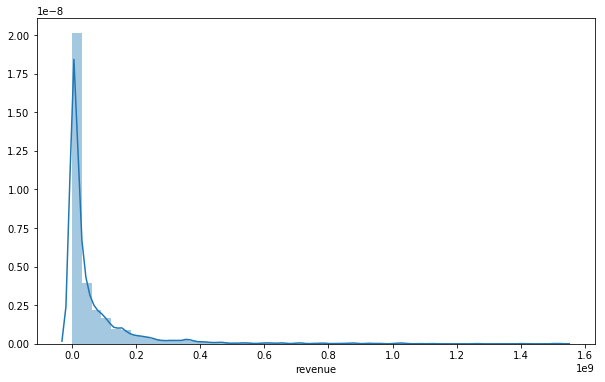

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(movies['revenue'])

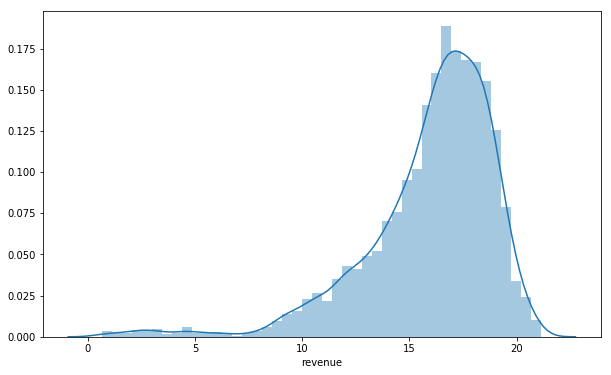

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(np.log1p(movies['revenue']))

In [44]:
movies['log_revenue'] = np.log1p(movies['revenue'])

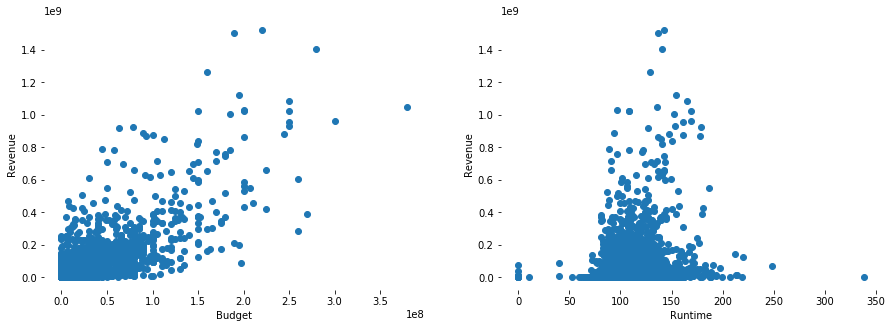

In [56]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(movies['budget'], movies['revenue'])
ax1.set_xlabel('Budget')
ax1.set_ylabel('Revenue')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(movies['runtime'], movies['revenue'])
ax2.set_xlabel('Runtime')
ax2.set_ylabel('Revenue')

direc = ['right', 'left', 'top', 'bottom']
for d in direc:
        ax1.spines[d].set_visible(False)
        ax2.spines[d].set_visible(False)

In [58]:
movies[u_departments].describe()

,Directing,Writing,Production,Sound,Camera,Editing,Art,Costume & Make-Up,Crew,Lighting,Visual Effects,Actors
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.651333,2.189000,5.295667,3.106333,1.808000,1.502667,2.689667,2.05200,2.438333,0.434333,1.197000,0.001333
std,1.353653,1.597956,5.266893,4.559015,2.560597,1.726940,4.038993,3.51142,6.129115,1.235393,3.733475,0.044709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000,2.00000,2.000000,0.000000,0.000000,0.000000
max,30.000000,20.000000,34.000000,31.000000,23.000000,14.000000,28.000000,33.00000,119.000000,12.000000,52.000000,2.000000


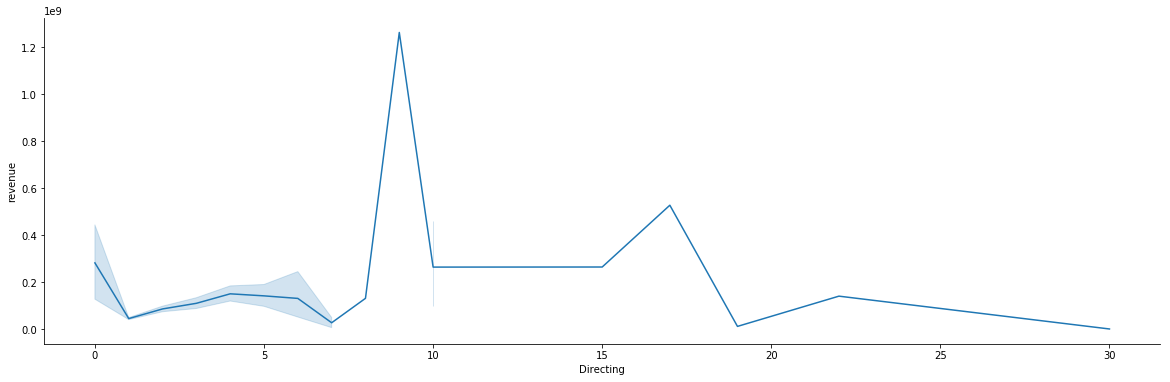

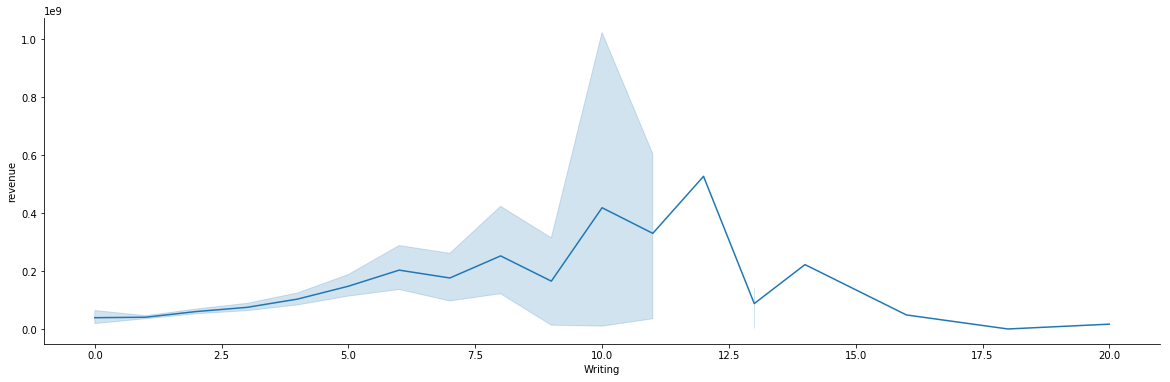

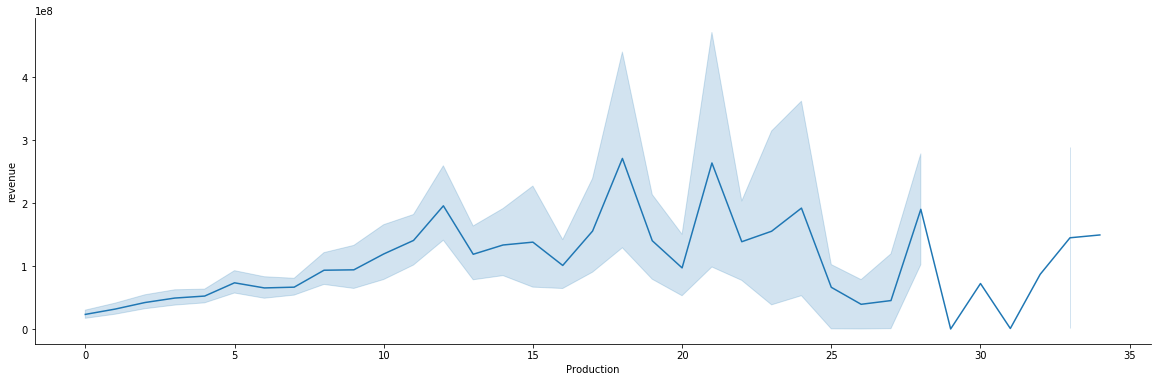

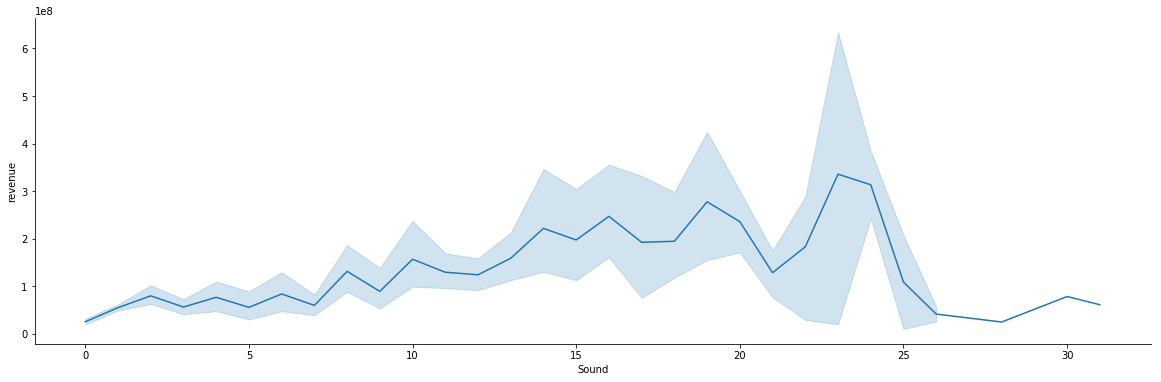

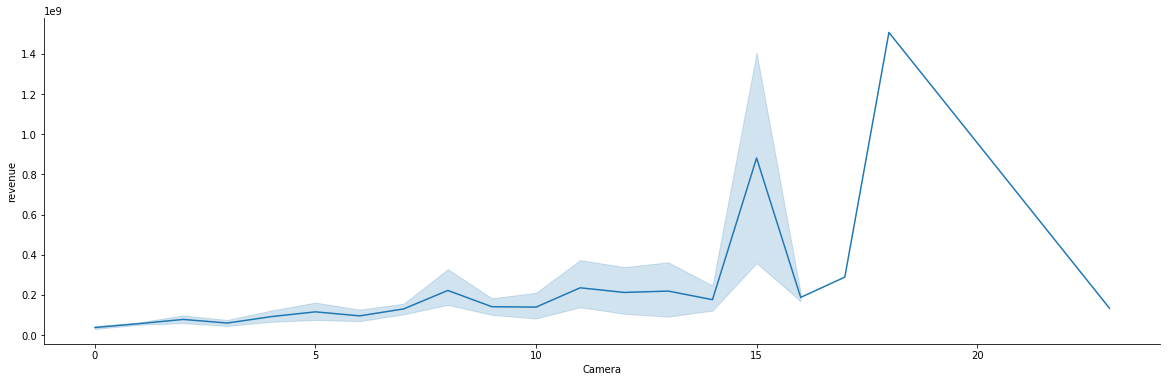

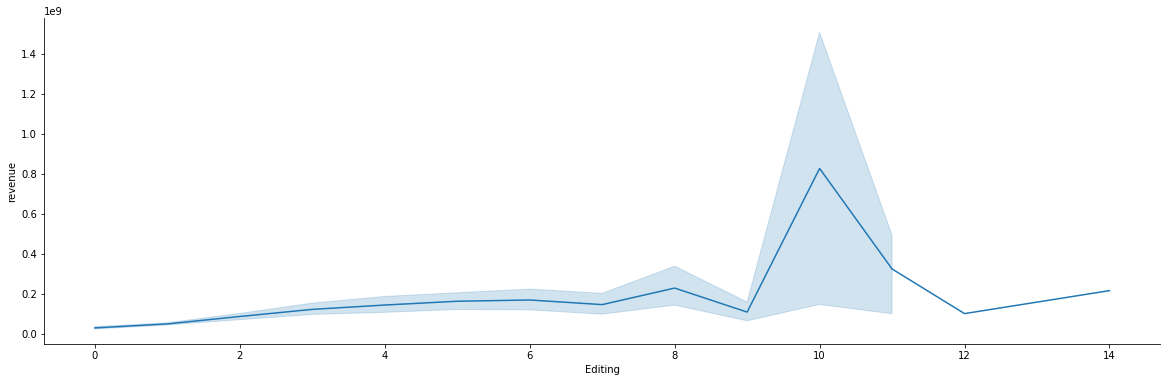

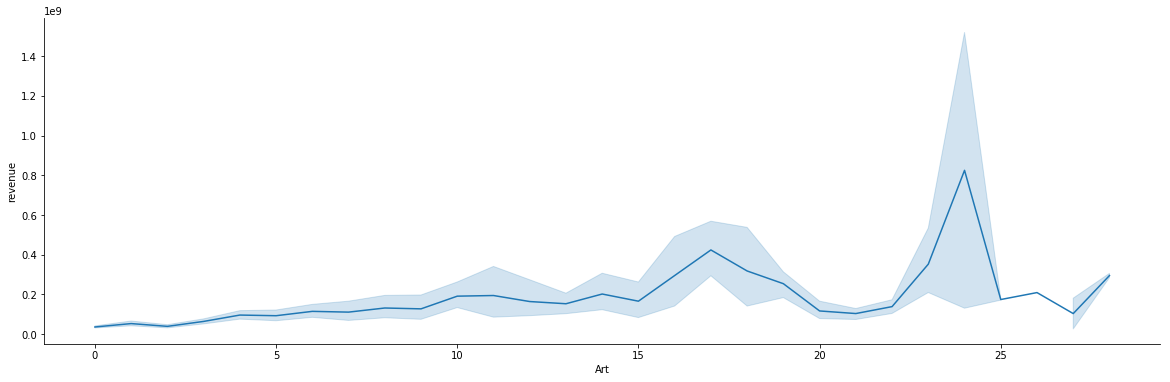

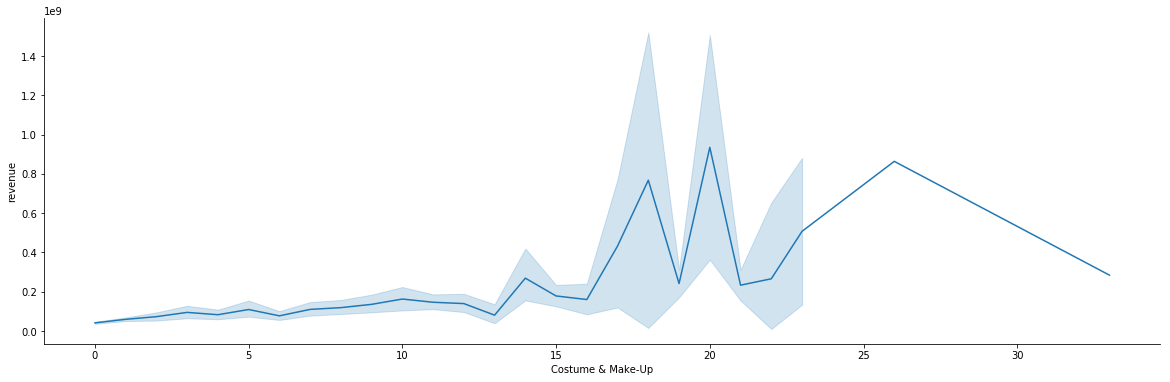

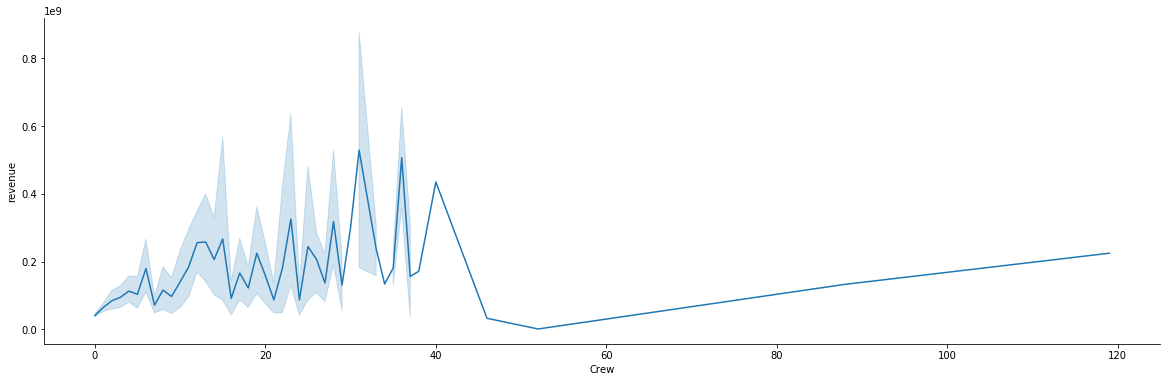

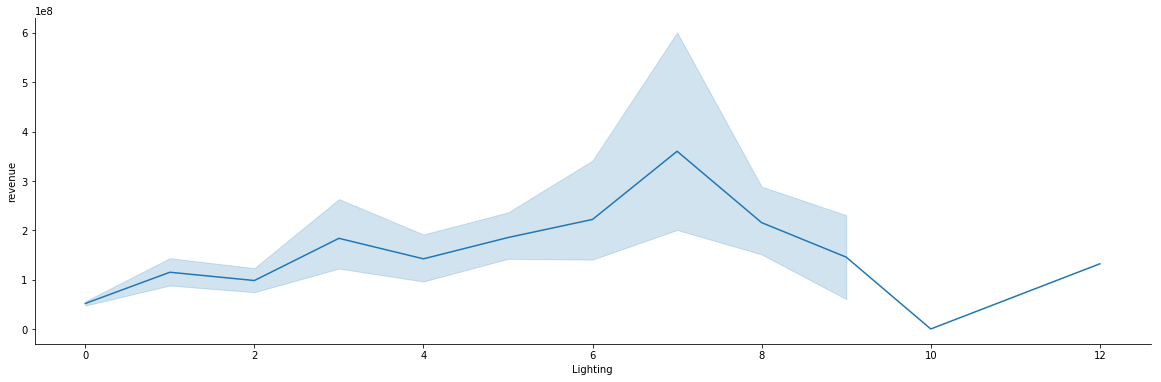

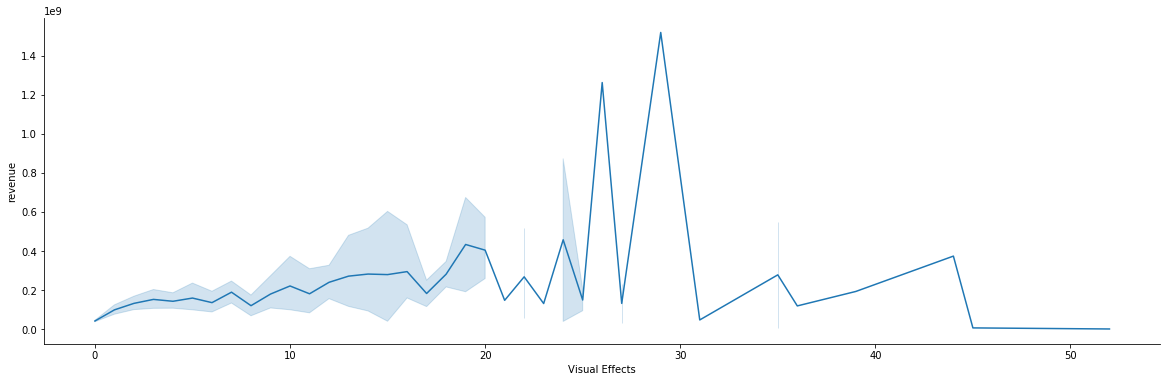

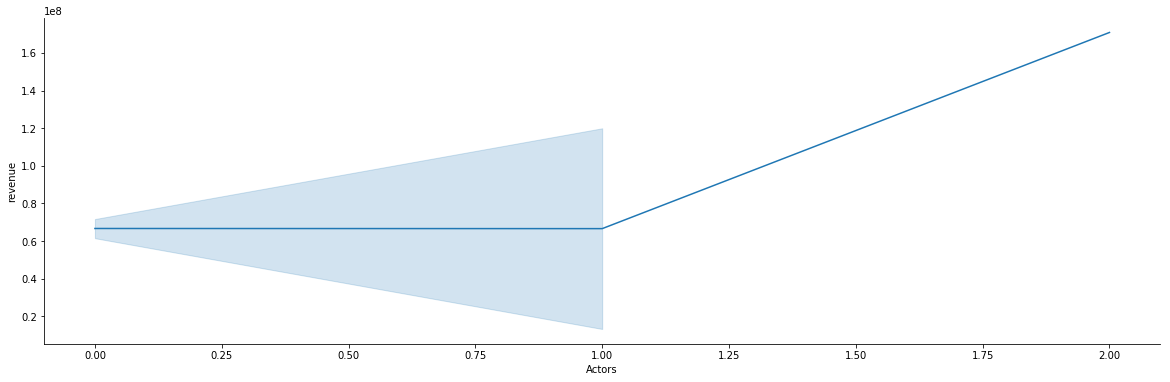

In [66]:

for d in u_departments:
    plt.figure(figsize=(20,6))
    sns.lineplot(movies[d], movies['revenue'])
    sns.despine()
    
#plt.legend(loc='upper_right')

The strength of the following departments

**Production**

**Sound**

**Lighting**

show a good relation with the collected revenue

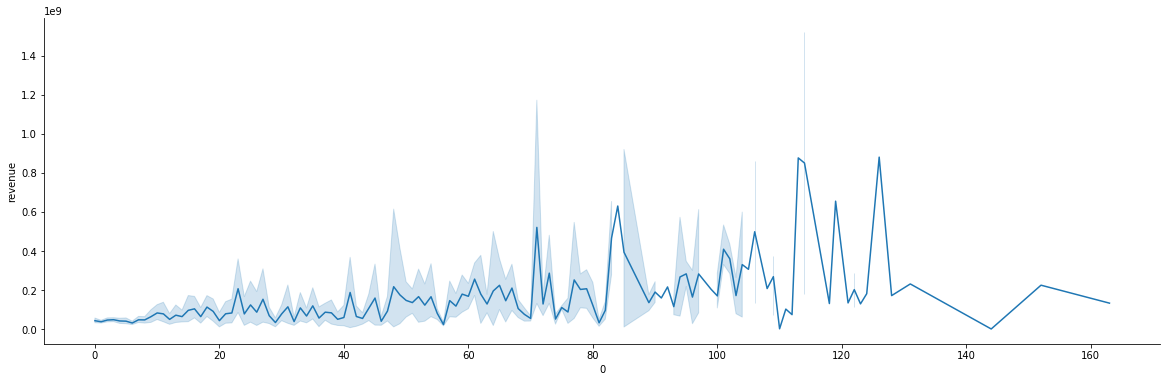

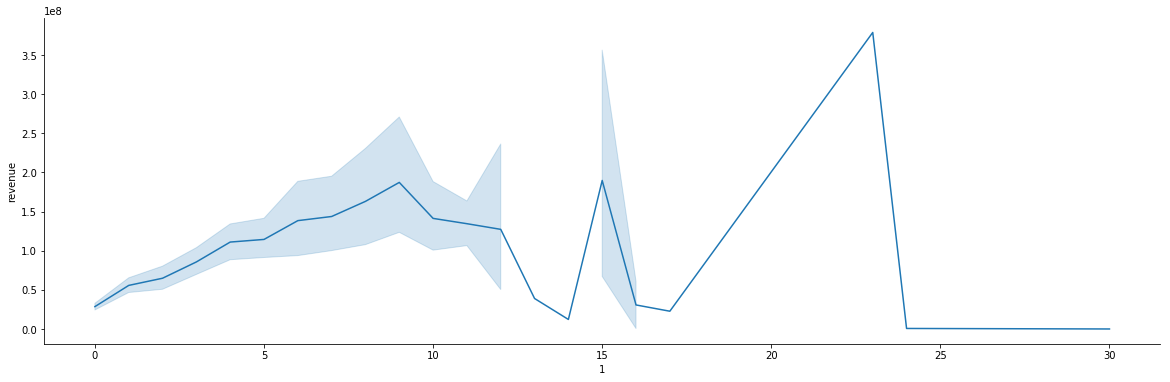

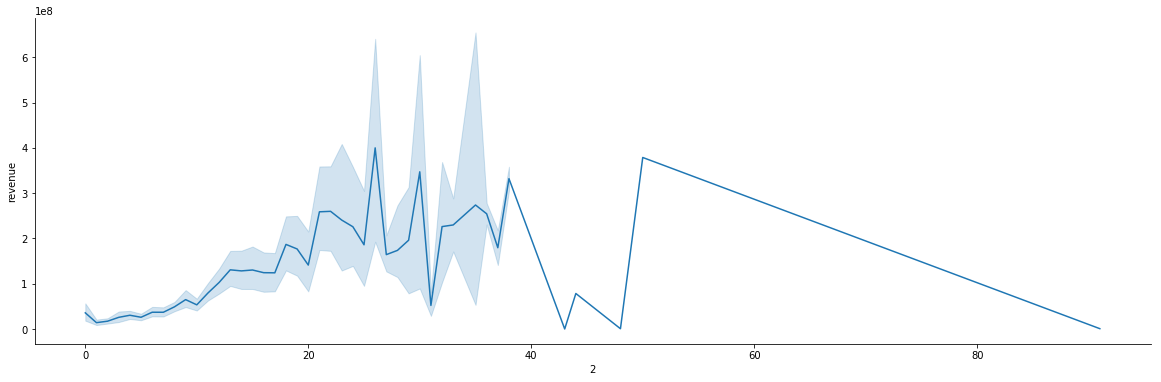

In [68]:
for g in [0,1,2]:
    plt.figure(figsize=(20,6))
    sns.lineplot(movies[g], movies['revenue'])
    sns.despine()

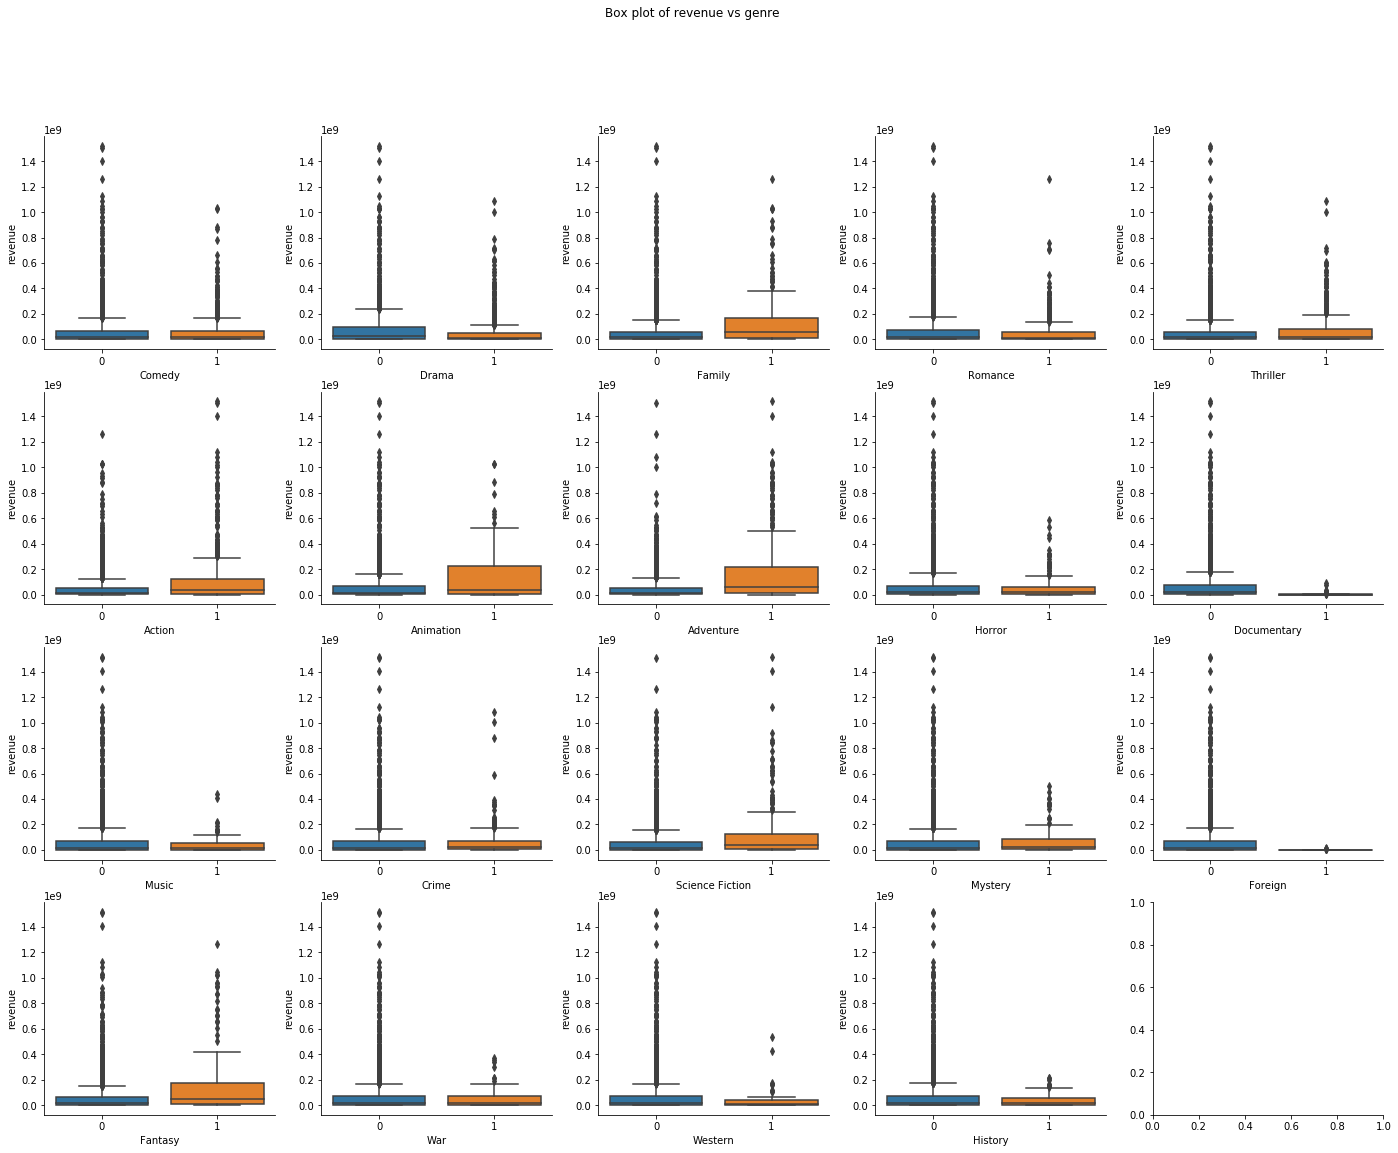

In [81]:
f, axs = plt.subplots(4,5, figsize=(24,18))
plt.suptitle('Box plot of revenue vs genre')
for i, c in enumerate([col for col in movies.columns if col in unique_lists[0]]):
    sns.boxplot(movies[c], movies['revenue'], ax=axs[i // 5][i % 5])
    sns.despine()

Belonging to the genres
1. Family
2. Animation
3. Action
4. Adventure
5. Science fiction and
6. Fantasy

shows in higher revenue than not belonging to those

In [84]:
len([col for col in movies.columns if col in unique_lists[2]])

39

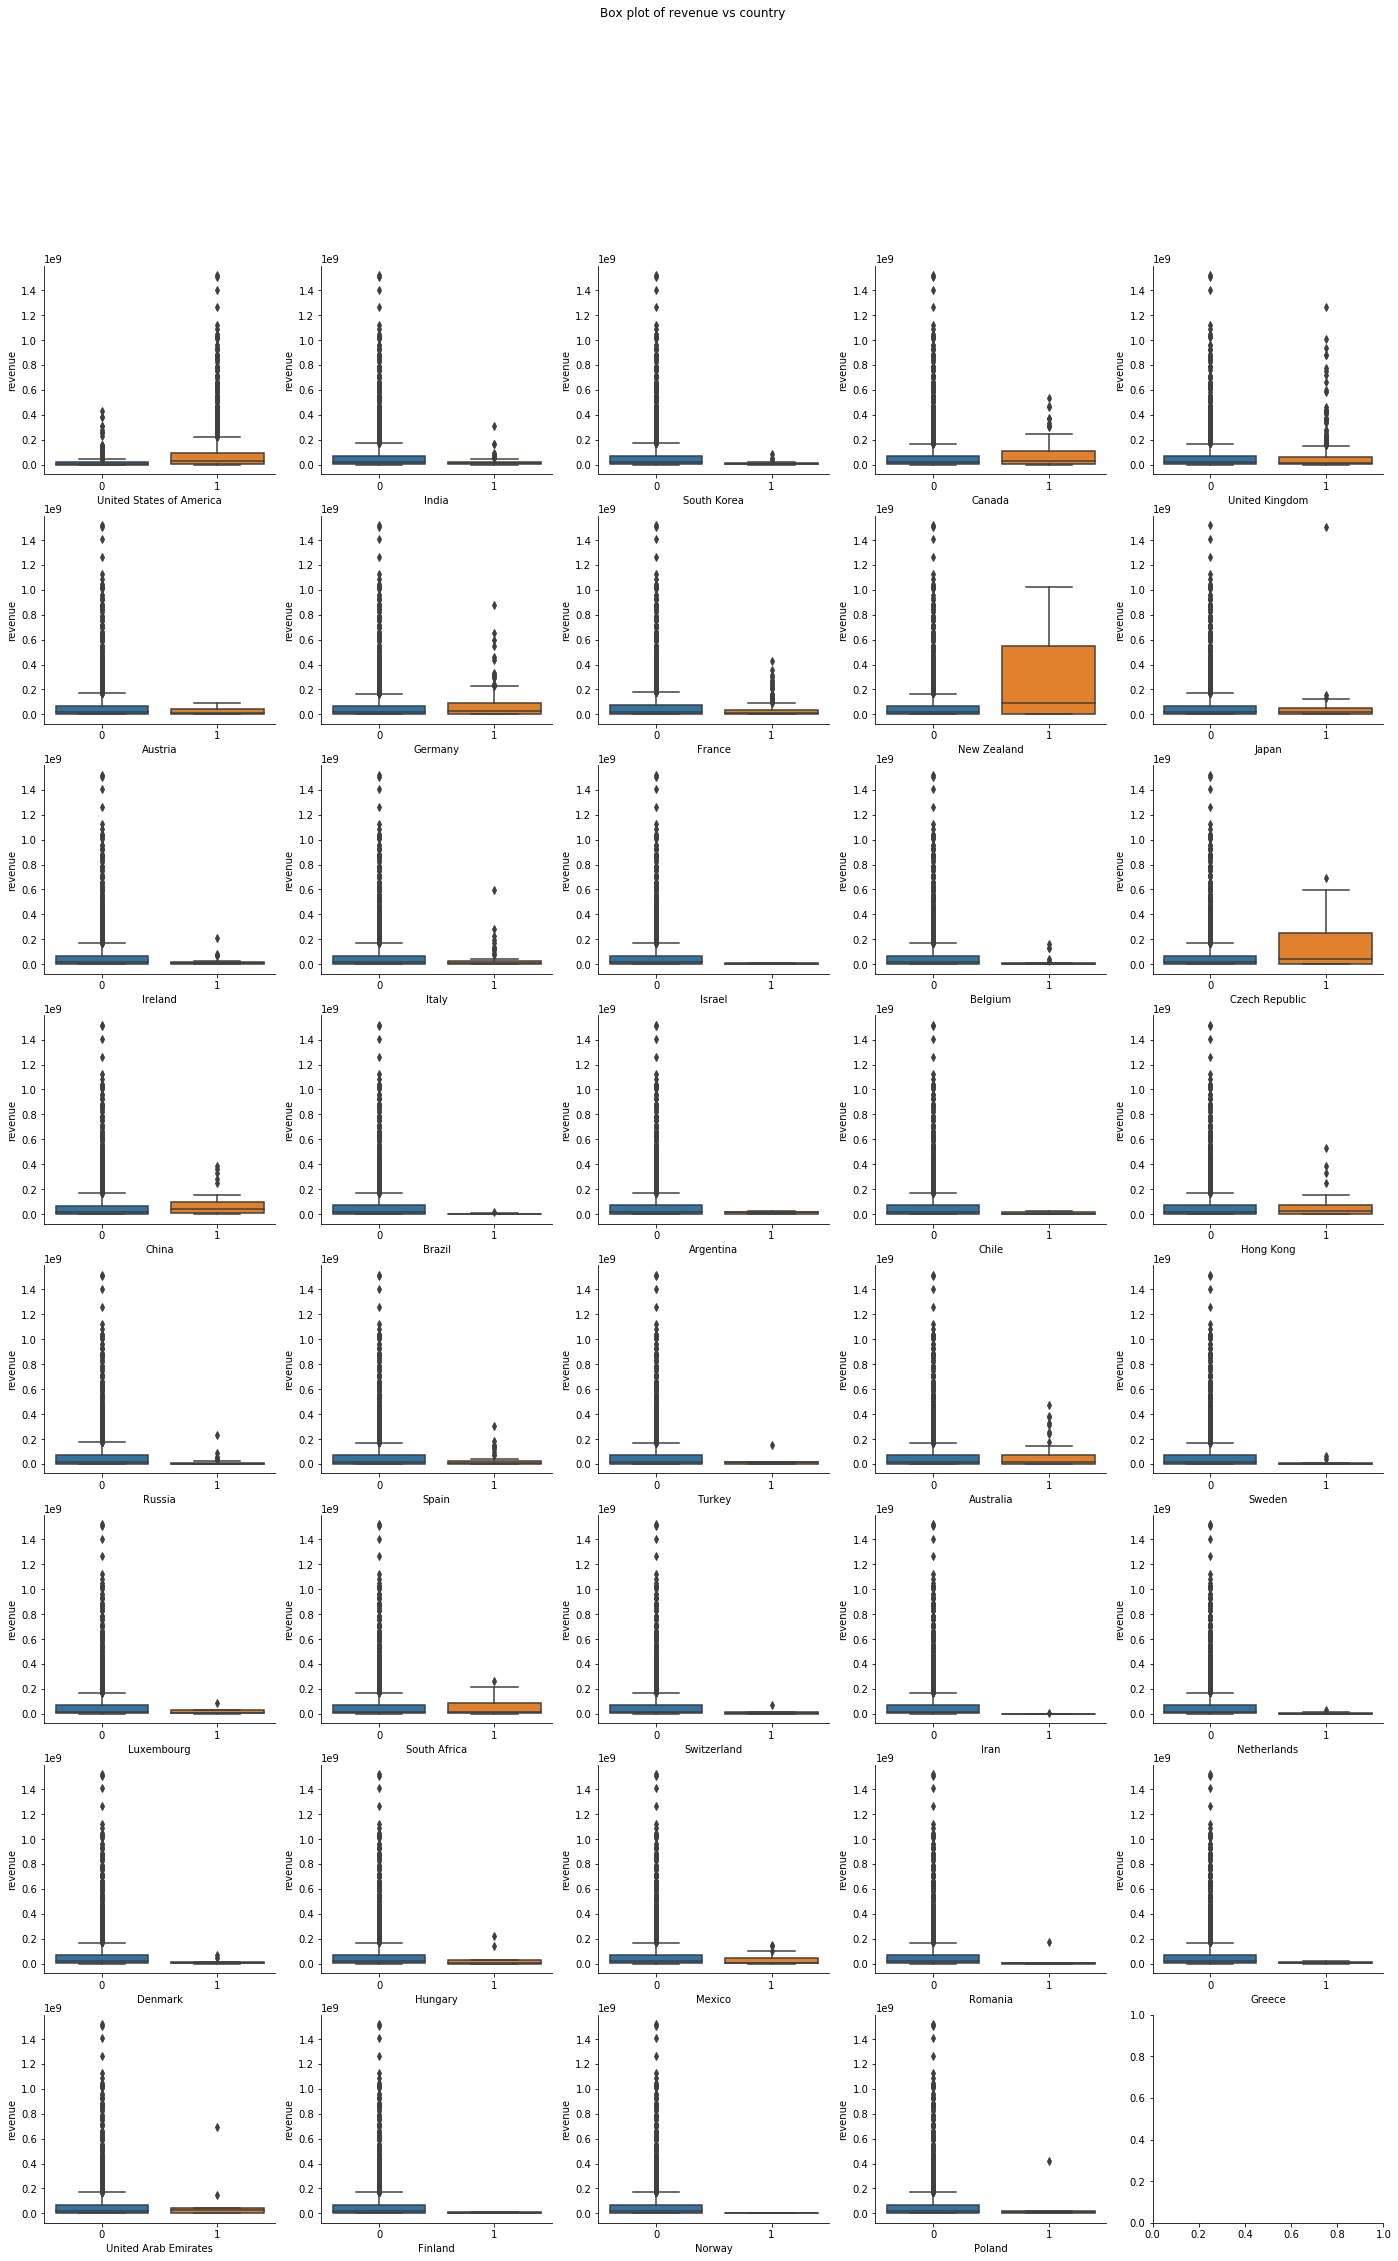

In [86]:
f, axs = plt.subplots(8,5, figsize=(24,36))
plt.suptitle('Box plot of revenue vs country')
for i, c in enumerate([col for col in movies.columns if col in unique_lists[2]]):
    sns.boxplot(movies[c], movies['revenue'], ax=axs[i // 5][i % 5])
    sns.despine()

Movies shot in **US, New zealand and Czech republic** show ridiculously high revenue than those **not shot** in these countries

In [96]:
#Top 30 production companies
u_prodc = [col for col in movies.columns if col in unique_lists[1]]
top_30_prodc = movies[u_prodc].sum().sort_values(ascending=False).iloc[:30].index

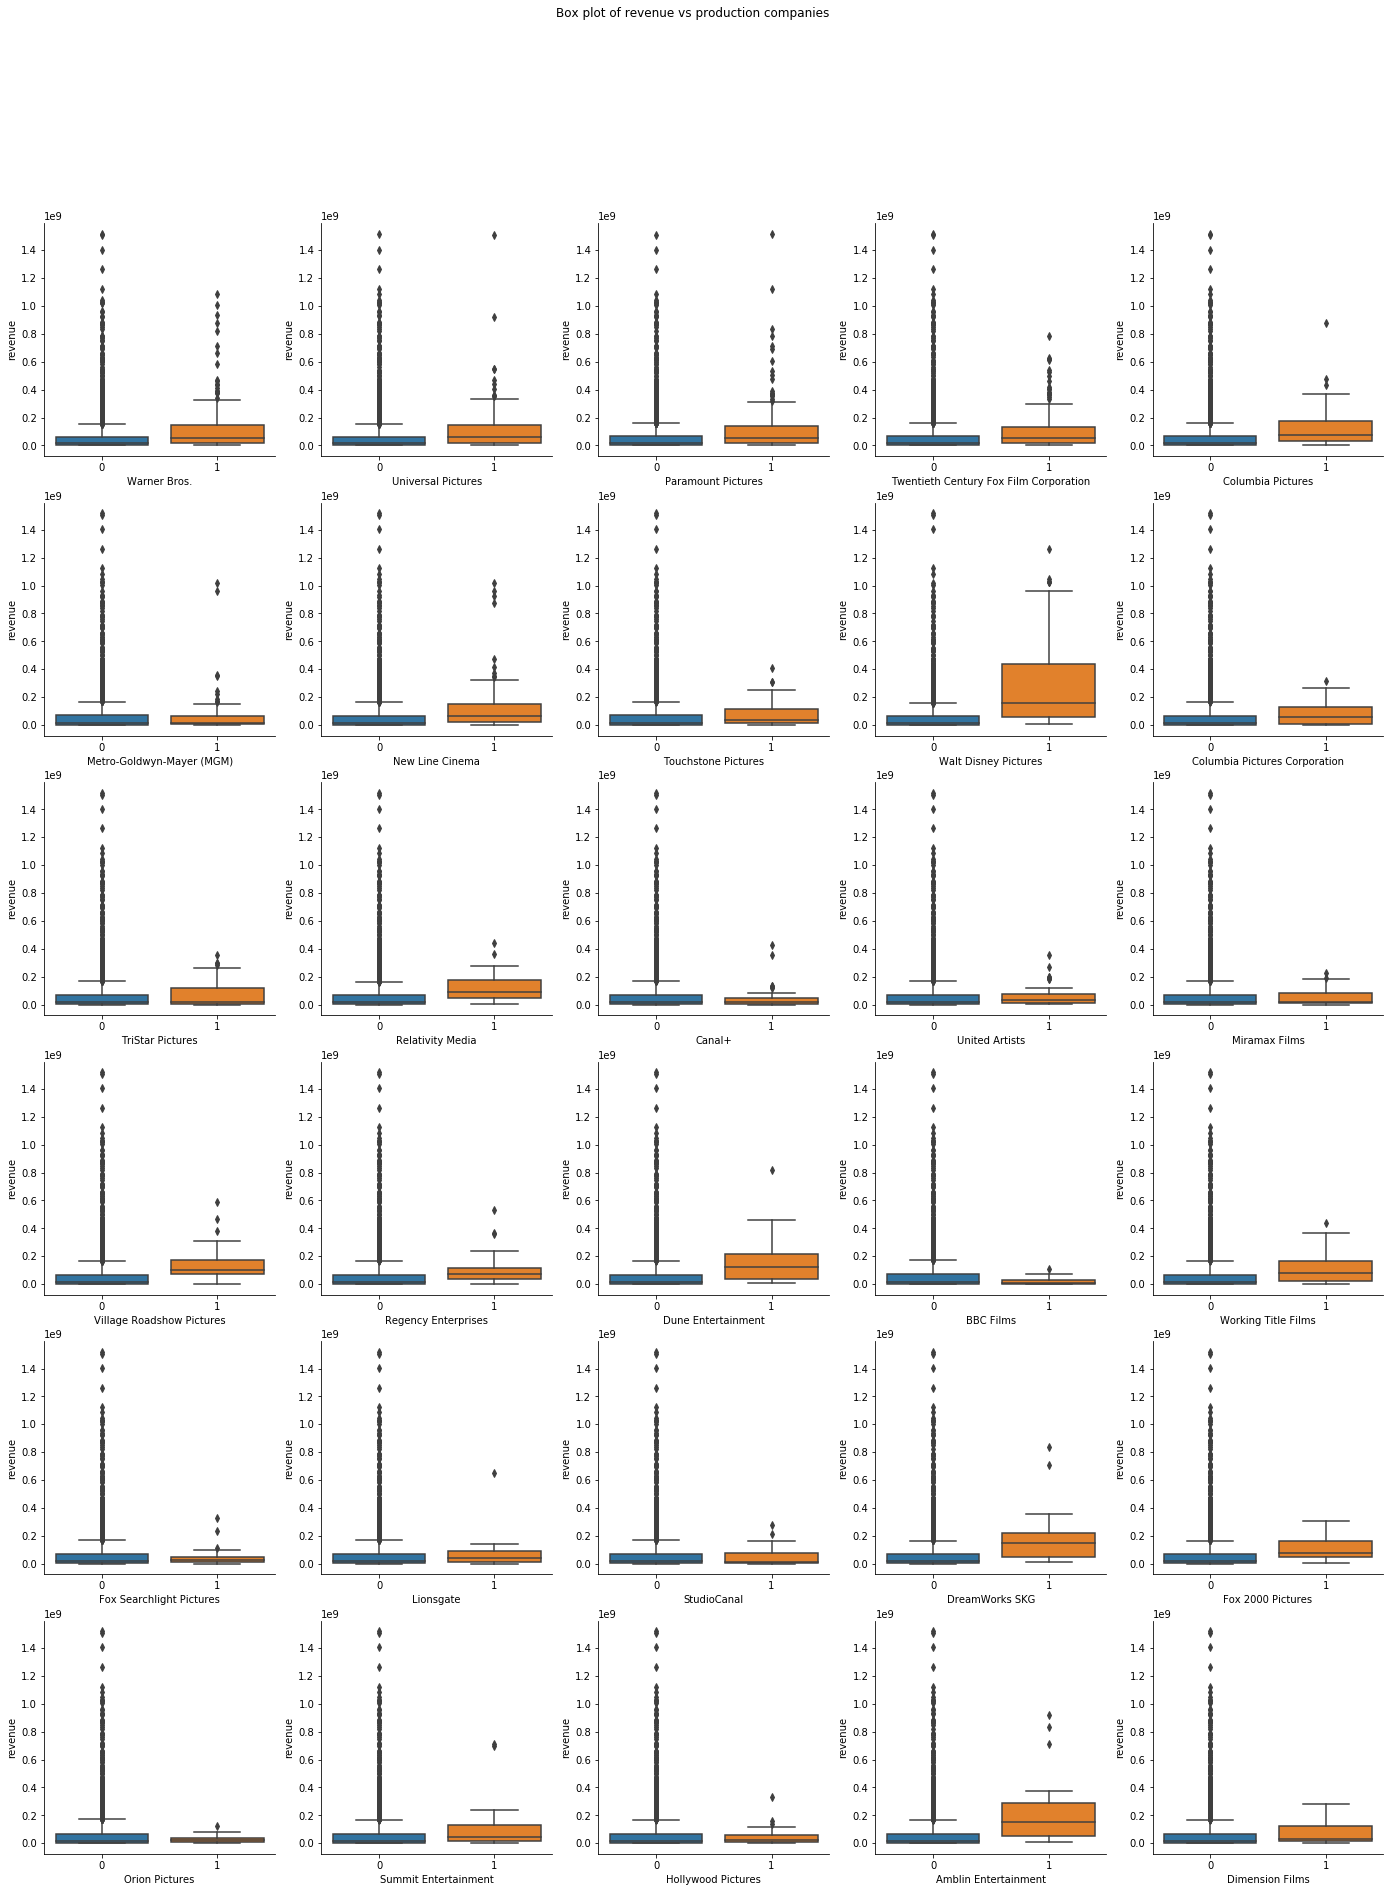

In [97]:
f, axs = plt.subplots(6,5, figsize=(24,30))
plt.suptitle('Box plot of revenue vs production companies')
for i, c in enumerate(top_30_prodc):
    sns.boxplot(movies[c], movies['revenue'], ax=axs[i // 5][i % 5])
    sns.despine()

Almost all of the top 30 production companies collect quite high revenue

Let's find out how does the revenue of a movie behave based on the number of production companies who have worked on it

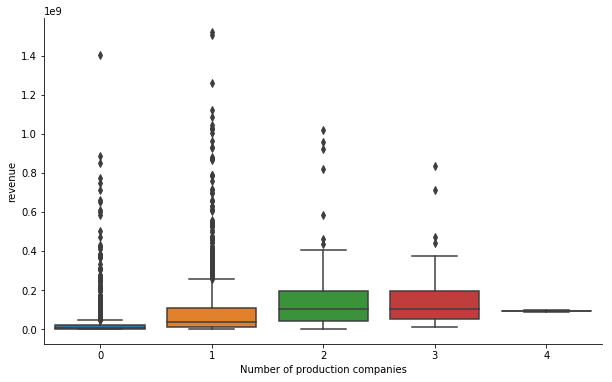

In [111]:
movies['num_companies'] = 0
for p in top_30_prodc:
    movies['num_companies'] = movies['num_companies'] + movies[p]
    
plt.figure(figsize=(10,6))
sns.boxplot(movies['num_companies'], movies['revenue'])
plt.xlabel('Number of production companies')
sns.despine()

Looks like we'll have to make some dummy variables for the number pf production companies

In [107]:
dum_prod = pd.get_dummies(movies['num_companies'], prefix='prodc')
movies = pd.concat([movies, dum_prod], axis = 1)

Text(0, 0.5, 'Revenue')

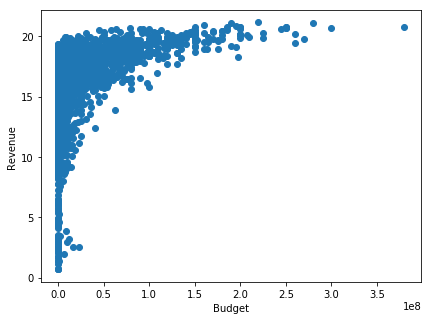

In [114]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(movies['budget'], movies['log_revenue'])
ax1.set_xlabel('Budget')
ax1.set_ylabel('Revenue')

### Model: Linear Regression

In [133]:
log_movies = movies.copy()

In [139]:
log_movies = log_movies.select_dtypes(include=['int','int64','float','float64','bool'])

In [140]:
log_movies = log_movies.transform(np.log1p)

In [179]:
train_m = log_movies.iloc[:2200].dropna()
test_m = log_movies.iloc[2200:].dropna()
train_mX = train_m.drop(['revenue','log_revenue'], axis=1)
train_mY = train_m['log_revenue']
test_mX = test_m.drop(['revenue','log_revenue'], axis=1)
test_mY = test_m['log_revenue']

from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_regression, k=40)
fs.fit(train_mX, train_mY)


SelectKBest(k=40, score_func=<function f_regression at 0x00000151B9BD5D90>)

In [180]:
fs.get_support(indices=True)

array([   1,    2,    4,    5,    8,   10,   12,   15,   17,   18,   22,
         25,   29,   43,   55,   64,  259,  279,  298,  336,  351,  414,
        765,  787, 1458, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086,
       3087, 3088, 3089, 3091, 3092, 3093, 3094], dtype=int64)

In [206]:
best_features = train_mX.columns[fs.get_support(indices=True)]
scores_df = pd.DataFrame(fs.scores_[:len(best_features)], index=best_features).sort_values(by=0, ascending=False)
scores_df

,0
runtime,442.942031
Drama,79.774662
Russia,76.182662
Twentieth Century Fox Film Corporation,62.294676
Paramount Pictures,52.065542
Foreign,43.636410
Directing,23.196377
Camera,23.085057
Action,22.825513
aftercreditsstinger,20.655584


In [198]:
bfr = list(best_features)
bfr.append('log_revenue')
corr_ = log_movies[bfr].corr()['log_revenue'].sort_values(ascending=False)
corr_

log_revenue                               1.000000
budget                                    0.419339
2                                         0.377161
num_companies                             0.363399
Production                                0.287786
Editing                                   0.283362
1                                         0.281862
Sound                                     0.272781
Art                                       0.271765
Camera                                    0.257367
United States of America                  0.247900
Costume & Make-Up                         0.229082
Visual Effects                            0.229047
Crew                                      0.221983
English                                   0.204265
0                                         0.197370
Writing                                   0.195695
Lighting                                  0.185130
runtime                                   0.166647
Adventure                      

In [205]:
log_movies[corr_[corr_ > 0.2].index].corr()

,log_revenue,budget,2,num_companies,Production,Editing,1,Sound,Art,Camera,United States of America,Costume & Make-Up,Visual Effects,Crew,English
log_revenue,1.000000,0.419339,0.377161,0.363399,0.287786,0.283362,0.281862,0.272781,0.271765,0.257367,0.247900,0.229082,0.229047,0.221983,0.204265
budget,0.419339,1.000000,0.378860,0.305734,0.287820,0.288982,0.304798,0.285324,0.311854,0.274722,0.253618,0.284924,0.262930,0.268137,0.202782
2,0.377161,0.378860,1.000000,0.381775,0.748352,0.700319,0.594433,0.686274,0.703434,0.681116,0.417618,0.609922,0.422630,0.552976,0.363793
num_companies,0.363399,0.305734,0.381775,1.000000,0.224474,0.243526,0.272818,0.225518,0.256940,0.227061,0.370289,0.224141,0.182790,0.181126,0.304179
Production,0.287786,0.287820,0.748352,0.224474,1.000000,0.678496,0.681031,0.653621,0.690692,0.651770,0.254364,0.616613,0.410649,0.521932,0.248013
Editing,0.283362,0.288982,0.700319,0.243526,0.678496,1.000000,0.587132,0.767375,0.715449,0.745950,0.235890,0.662414,0.521361,0.631302,0.205895
1,0.281862,0.304798,0.594433,0.272818,0.681031,0.587132,1.000000,0.571674,0.699916,0.587202,0.311757,0.659091,0.385123,0.489033,0.306674
Sound,0.272781,0.285324,0.686274,0.225518,0.653621,0.767375,0.571674,1.000000,0.759529,0.811883,0.189214,0.743912,0.600082,0.748208,0.160732
Art,0.271765,0.311854,0.703434,0.256940,0.690692,0.715449,0.699916,0.759529,1.000000,0.755705,0.249249,0.825760,0.578923,0.705976,0.232712
Camera,0.257367,0.274722,0.681116,0.227061,0.651770,0.745950,0.587202,0.811883,0.755705,1.000000,0.228856,0.766018,0.551346,0.687550,0.197332


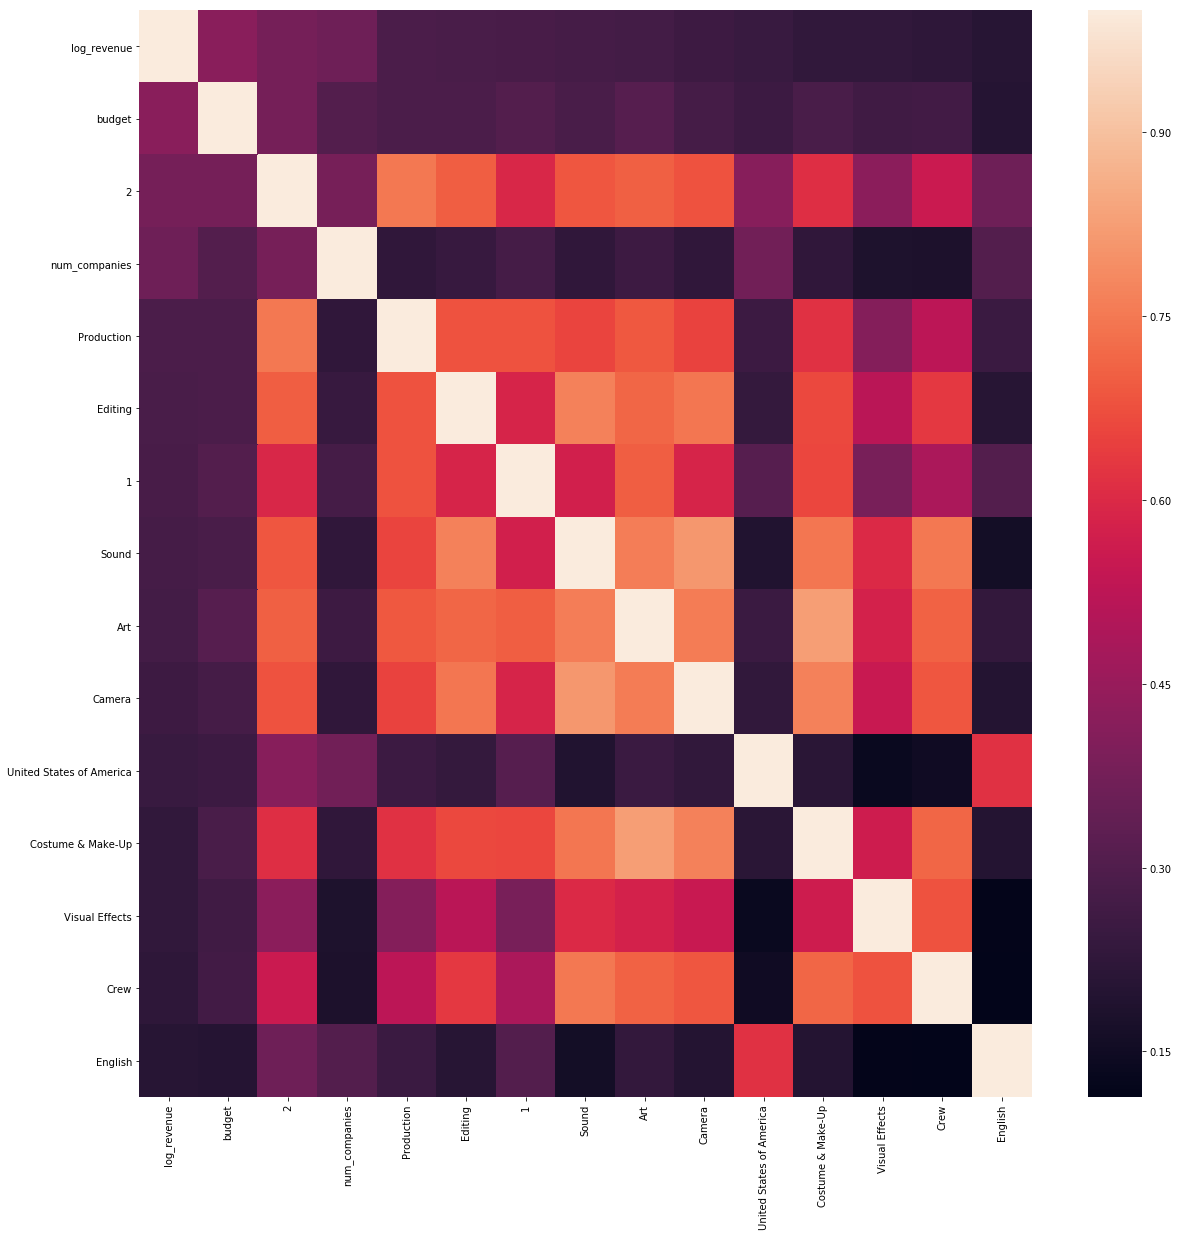

In [204]:
plt.figure(figsize=(20,20))

sns.heatmap(log_movies[corr_[corr_ > 0.2].index].corr())

In [242]:
lr = LinearRegression()
train_features = scores_df[scores_df[0]>20].index

lr.fit(train_mX[train_features], train_mY)
predictions = lr.predict(test_mX[train_features])

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse = mean_squared_error(test_mY, predictions)**0.5
r2 = r2_score(test_mY, predictions)
print(rmse)
print(r2)

0.22714228554065943
0.10023790940000776


In [238]:
test_mY.min()

0.8697416861919438

In [241]:
lr1 = LinearRegression()
train_features = scores_df[corr_>0.2].index

lr1.fit(train_mX[train_features], train_mY)
predictions1 = lr1.predict(test_mX[train_features])

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse = mean_squared_error(test_mY, predictions1)**0.5
r2 = r2_score(test_mY, predictions1)
print(rmse)
print(r2)

0.2015512493324477
0.29156061491814544


In [252]:
if __name__ == '__main__':
    n = int(input())
    for i in range(n):
        print(i+1, end='')

15
123456789101112131415

In [250]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

